In [5]:
import torch
print(torch.__version__)
print('CUDA available: ' + str(torch.cuda.is_available()))
print('cuDNN version: ' + str(torch.backends.cudnn.version()))
a = torch.cuda.FloatTensor(2).zero_()
print('Tensor a = ' + str(a))
b = torch.randn(2).cuda()
print('Tensor b = ' + str(b))
c = a + b
print('Tensor c = ' + str(c))

import torchvision
print(torchvision.__version__)
from torchvision import datasets, transforms, models

1.4.0
CUDA available: True
cuDNN version: 7603
Tensor a = tensor([0., 0.], device='cuda:0')
Tensor b = tensor([ 0.2780, -0.5742], device='cuda:0')
Tensor c = tensor([ 0.2780, -0.5742], device='cuda:0')
0.2.2


# 導入函式庫並確認版本

In [2]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

# 透過 Kaggle API 下載數據集

In [2]:
''' 先安裝 kaggle API '''
#!pip3 install -U -q kaggle

''' 下載 JASON 取得 使用者名稱及金鑰 '''
# 右上方大頭貼 > My Account > 下拉至API欄位並點擊 Create New API Token就可以取得認證的JSON檔

''' 將使用者名稱及金鑰新增到Jetson nano上 '''
!mkdir -p ~/.kaggle
!echo '{"username":"chiachunchang","key":"6b197e6088571f65a1cb92c1664e4faa"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

''' 下載 Dataset '''
!kaggle competitions download -c dogs-vs-cats -p data

命令語法不正確。
系統找不到指定的路徑。
'chmod' 不是內部或外部命令、可執行的程式或批次檔。
'kaggle' 不是內部或外部命令、可執行的程式或批次檔。


# 確認檔案並解壓縮

In [17]:
%ls

cats_vs_dogs.ipynb  data/


In [18]:
%cd data
%ls

/home/dlinano/Desktop/chun/cats_vs_dogs/data
dogs-vs-cats.zip


In [20]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip test1.zip
!unzip train.zip

In [27]:
%cd train

/home/dlinano/Desktop/chun/cats_vs_dogs/data/train


# 查看資料

In [ ]:
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

org_path = '/home/dlinano/Desktop/chun/cats_vs_dogs/data/train'
total_data = os.listdir(org_path)
count_data = len(total_data)
print('總共有{}張照片'.format(count_data))
print('\n以下顯示9筆資料，其中標題是檔名')

plt.figure(dpi=100)

for i,d in enumerate(total_data[:9]):    # 只取前九張
    
    im_path = os.path.join(org_path, d)    # 取得檔案的完整路徑
    plt.subplot(3,3,i+1)                   # 宣告子圖
    plt.xticks([]), plt.yticks([])         # 去掉 x y 座標
    plt.title(d)                           # 標題是檔名
    plt.imshow(mpimg.imread(im_path))      # 將圖片讀出來並顯示
    
plt.tight_layout()    # 圖表過度集中可以使用.tight_layout分開
plt.show()

# 資料整理

In [4]:
import os
import shutil

""" 基本目錄位置宣告 """
train_path = '/home/dlinano/Desktop/chun/cats_vs_dogs/data/train/'
total_data = os.listdir(train_path)          # 取得所有檔案名稱
cat_path = os.path.join(train_path, 'cat')   # 貓咪資料目錄
dog_path = os.path.join(train_path, 'dog')   # 狗狗資料目錄

""" 確認目標目錄是否存在 """
if os.path.exists(cat_path)==False :
  print('新建貓咪的資料夾 ({})'.format(cat_path))
  os.mkdir(cat_path)

if os.path.exists(dog_path)==False :
  print('新建狗狗的資料夾({})'.format(dog_path))
  os.mkdir(dog_path)

""" 將資料歸類到對應的資料夾 """
print('開始整理數據')
for i, data in enumerate(total_data):

  org_path = os.path.join(train_path, data)   # 取得檔案完整路徑

  if data == 'cat' or data == 'dog':          # 由於有貓跟狗的資料夾
    pass                                      # 遇到直接將迴圈跳過
  else:
    label = data.split('.')[0]                  # 透過.來分割出檔名
    if label == 'cat':
      trg_path = os.path.join(cat_path, data)   # 取得新的貓咪檔案位置
    elif label == 'dog':
      trg_path = os.path.join(dog_path, data)   # 取得新的狗狗檔案位置
    shutil.move(org_path, trg_path)             # 直接將其移動過去

""" 確認資料量 """
print('資料整理完成')
print('貓咪數據量:{}\t狗狗數據量:{}'.format(len(os.listdir(cat_path)), len(os.listdir(dog_path))))

開始整理數據
資料整理完成
貓咪數據量:12500	狗狗數據量:12500


# 建置數據集、查看訓練資料及標籤

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models

data_dir = '/home/dlinano/Desktop/chun/cats_vs_dogs/data/train/'

""" 宣告 transfrom """
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                                       ])
""" 建立一個數據集 """
train_data = datasets.ImageFolder(data_dir, transform=train_transforms)

print('自動化後的標籤: ',train_data.class_to_idx)
print('顯示路徑與標籤: ', train_data.imgs[0])
print('取得圖片與標籤，第一維是第幾張，第二維0是圖片1是標籤')

print(train_data[0][0].shape)

自動化後的標籤:  {'cat': 0, 'dog': 1}
顯示路徑與標籤:  ('/home/dlinano/Desktop/chun/cats_vs_dogs/data/train/cat/cat.0.jpg', 0)
取得圖片與標籤，第一維是第幾張，第二維0是圖片1是標籤
torch.Size([3, 224, 224])


In [7]:
""" 丟進DataLoader並設定參數，一次丟16張照片、隨機打亂 """
train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)

for idx, (data, label) in enumerate(train_loader):
    if idx<10:
        print('[{:02}] {} , {} '.format(idx+1, data.shape, label))
    else:
        break
        

[01] torch.Size([16, 3, 224, 224]) , tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0]) 
[02] torch.Size([16, 3, 224, 224]) , tensor([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]) 
[03] torch.Size([16, 3, 224, 224]) , tensor([0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1]) 
[04] torch.Size([16, 3, 224, 224]) , tensor([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0]) 
[05] torch.Size([16, 3, 224, 224]) , tensor([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]) 
[06] torch.Size([16, 3, 224, 224]) , tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]) 
[07] torch.Size([16, 3, 224, 224]) , tensor([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1]) 
[08] torch.Size([16, 3, 224, 224]) , tensor([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]) 
[09] torch.Size([16, 3, 224, 224]) , tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]) 
[10] torch.Size([16, 3, 224, 224]) , tensor([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1]) 


# 建立一個CNN

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, batch ):
        super(CNN, self).__init__()
        
        self.conv_1 = nn.Conv2d(3, 32, (3,3), stride=1, padding=1)   # 224-3+1+2=224 (Conv) , 224/2=112 (Pool)
        self.maxpool_1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv_2 = nn.Conv2d(32, 64, (3,3), stride=1, padding=1)  # 112-3+1+2=112, 112/2=56
        self.maxpool_2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv_3 = nn.Conv2d(64, 128, (3,3), stride=1, padding=1)  # 56-3+1+2=56, 56/2=28
        self.maxpool_3 = nn.MaxPool2d(kernel_size=2)
        
        # 16 filter, 32,32 = (h,w)
        self.fc_1 = nn.Linear(128*(28*28) , 512)
        self.fc_2 = nn.Linear(512, 2)    # 最後有幾個類別
        
    def forward(self, x):
        
        out = self.maxpool_1(F.relu(self.conv_1(x)))
        out = self.maxpool_2(F.relu(self.conv_2(out)))
        out = self.maxpool_3(F.relu(self.conv_3(out)))
        out = out.view(-1, self.num_flat_features(out))    # Flatten
        out = F.relu(self.fc_1(out))
        out = F.softmax(self.fc_2(out)) 
        return out
    
    """ 官方提供的算法，其實前面已經手算過了 """
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
batch_size = 16
model = CNN(batch_size)
print(model)
test = torch.rand([batch_size,3,224,224])
print(model(test))

CNN(
  (conv_1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc_1): Linear(in_features=100352, out_features=512, bias=True)
  (fc_2): Linear(in_features=512, out_features=2, bias=True)
)
tensor([[0.5078, 0.4922],
        [0.5067, 0.4933],
        [0.5065, 0.4935],
        [0.5079, 0.4921],
        [0.5075, 0.4925],
        [0.5068, 0.4932],
        [0.5070, 0.4930],
        [0.5069, 0.4931],
        [0.5072, 0.4928],
        [0.5067, 0.4933],
        [0.5079, 0.4921],
        [0.5070, 0.4930],
        [0.5078, 0.4922],
        [0.5074, 0.4926]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


# 開始訓練

In [9]:
import torch.optim as optim
import matplotlib.pyplot as plt
import time

""" 基本參數 """
epochs = 5
batchs = 32
lr = 1e-4
step = 0
train_loss = []
test_loss = []

""" 設定GPU """
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

""" 將模型、損失函數、優化器等實例化 """
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batchs, shuffle=True)
model = CNN(batchs).to('cuda')
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(model.parameters(), lr= lr)

""" 時間、紀錄 """
start = time.time()
model.train()

print('開始訓練')
for i in range(epochs+1):
    
    print('iteration : {}\n'.format(i+1))
    training_loss = 0
    epoch_time = time.time()
    
    for idx, (data, label) in enumerate(train_loader):
        
        data, label = data.to(device), label.to(device)
        
        step += 1
        predict = model(data)
        loss = loss_fn( predict, label)
        
        training_loss += loss.item()

        opt.zero_grad()
        
        loss.backward()
        
        opt.step()
        
        if(idx==0 or idx%10==0):
            print('[{}/{}] [{:04}/{:4}] loss:{:.6f}'.format(i, epochs, idx, int(25000/16) ,loss.item()))
    
    train_loss.append(training_loss*batchs/len(train_loader.dataset))
    print("[{}/{}] loss:{:8.6f} time:{}".format(i, epochs, train_loss[i], time.time()-epoch_time))

end = time.time()
model.eval()

print('Cost time:', end-start)


開始訓練
iteration : 1



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[0/5] [0000/1562] loss:0.694367
[0/5] [0010/1562] loss:0.685143
[0/5] [0020/1562] loss:0.634767
[0/5] [0030/1562] loss:0.691871
[0/5] [0040/1562] loss:0.718661
[0/5] [0050/1562] loss:0.664177
[0/5] [0060/1562] loss:0.634414
[0/5] [0070/1562] loss:0.700477
[0/5] [0080/1562] loss:0.689339
[0/5] [0090/1562] loss:0.681210
[0/5] [0100/1562] loss:0.652735
[0/5] [0110/1562] loss:0.633121
[0/5] [0120/1562] loss:0.599803
[0/5] [0130/1562] loss:0.700478
[0/5] [0140/1562] loss:0.723173
[0/5] [0150/1562] loss:0.584880
[0/5] [0160/1562] loss:0.593320
[0/5] [0170/1562] loss:0.725903
[0/5] [0180/1562] loss:0.595133
[0/5] [0190/1562] loss:0.552067
[0/5] [0200/1562] loss:0.547549
[0/5] [0210/1562] loss:0.626333
[0/5] [0220/1562] loss:0.598561
[0/5] [0230/1562] loss:0.577322
[0/5] [0240/1562] loss:0.574467
[0/5] [0250/1562] loss:0.689757
[0/5] [0260/1562] loss:0.583301
[0/5] [0270/1562] loss:0.625083
[0/5] [0280/1562] loss:0.635525
[0/5] [0290/1562] loss:0.580983
[0/5] [0300/1562] loss:0.543278
[0/5] [0

KeyboardInterrupt: 

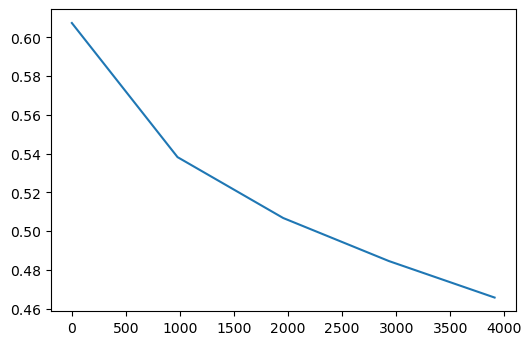

In [197]:
y = train_loss[:]
x = np.linspace(0, step, len(y))

plt.figure(dpi=100)
plt.plot(x, y)
plt.show()

# 測試

C:\Users\p5138\Anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[3.7983e-02, 9.6202e-01],
        [2.0427e-11, 1.0000e+00],
        [9.9572e-01, 4.2805e-03],
        [9.9888e-01, 1.1196e-03],
        [1.3791e-02, 9.8621e-01],
        [1.0031e-01, 8.9969e-01],
        [9.9929e-01, 7.0732e-04],
        [9.9669e-01, 3.3086e-03],
        [8.7459e-01, 1.2541e-01],
        [9.9945e-01, 5.4729e-04],
        [9.8498e-01, 1.5015e-02],
        [9.8234e-01, 1.7660e-02],
        [1.0338e-03, 9.9897e-01],
        [3.9721e-07, 1.0000e+00],
        [3.3049e-01, 6.6951e-01],
        [9.1665e-02, 9.0834e-01]], device='cuda:0')
tensor([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1], device='cuda:0')


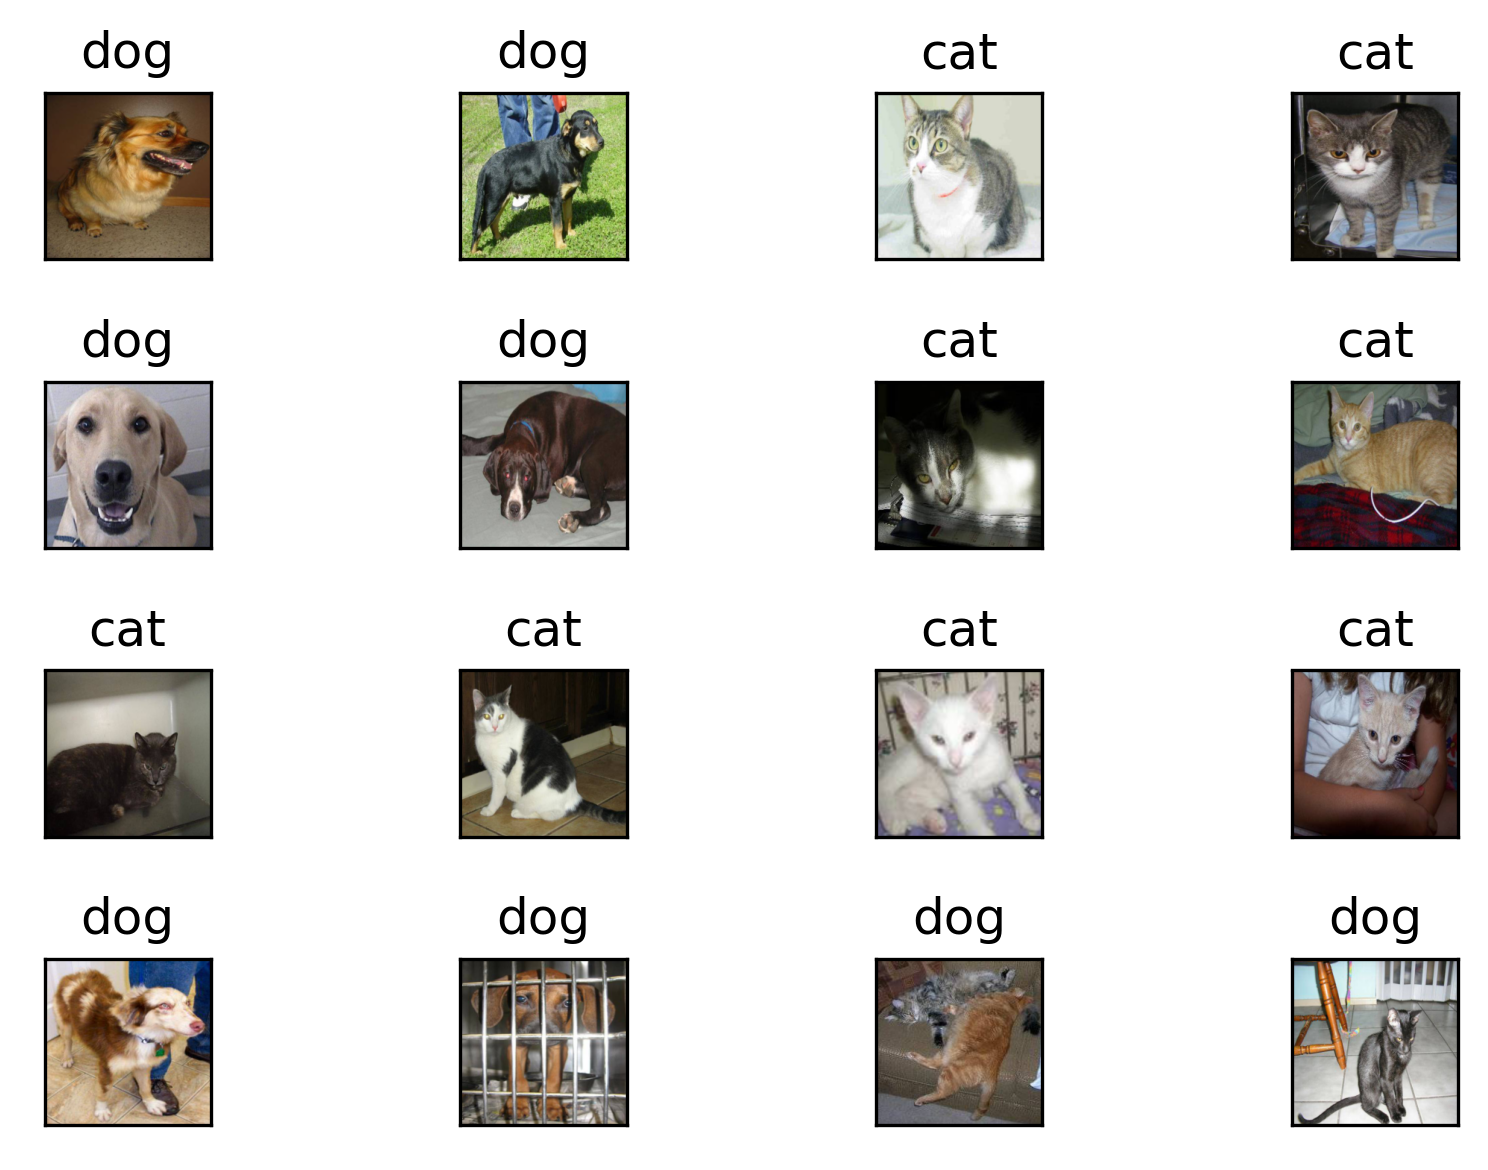

In [198]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt

def cvt_img(im):
    im = im.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.5, ])
    std = np.array([0.5, ])
    im = std * im + mean
    #im = np.clip(im, 0, 1)
    return im

test_dir = 'C:\\Users\\p5138\\Downloads\\test1\\'

test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5,), (0.5,))
                                       ])

""" 建立一個數據集 """
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=True)
fig = plt.figure(dpi=300)

for idx, (data,_) in enumerate(test_loader):
    
    with torch.no_grad():
    
        if idx>=1: break

        predict = model(data.to(device))
        
        _, predicted = torch.max(predict, 1)
        
        print(predict)
        print(predicted)
        
        for i in range(16):
            plt.subplot(4,4,i+1)
            plt.xticks([]), plt.yticks([])
            plt.title('cat' if predicted[i].cpu().numpy()==0 else 'dog')
            plt.imshow(cvt_img(data[i]))

plt.tight_layout()
plt.show()